In [1]:
!chmod 777 /content/drive/MyDrive/infosec_ai/test.sh
!bash /content/drive/MyDrive/infosec_ai/test.sh

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild() 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
<Figure size 500x500 with 1 Axes>


In [2]:
import requests

#API 인증  정보
client_id = "udzt3jcCA8xTKi3UjGH_" 
client_secret = "HAk0g9n8cs"

#header에  추가될  내용
key = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

In [3]:
def get_api_result(keyword, display, start):
  url="https://openapi.naver.com/v1/search/blog?query=" + keyword \
       +"&display="+str(display)\
       +"&start="+str(start)
  result = requests.get(url, headers=key)
  return result.json()

In [4]:
blog_title_list = []
def call_and_print(keyword, page):
    json_obj = get_api_result(keyword, 20, (page - 1) * 20 + 1)
    if "items" in json_obj:
        for item in json_obj['items']:
            title = item['title'].replace("<b>", "").replace("</b>", "")
            global blog_title_list
            blog_title_list.append(title)

In [5]:
for page in range(1, 100):
    call_and_print('강남역', page)

In [6]:
len(blog_title_list)

1000

In [7]:
!pip install nltk
!pip install konlpy

In [8]:
import nltk
from konlpy.tag import Twitter

In [9]:
twitter = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [10]:
word_list = []
for blog_title in blog_title_list:
    for word, part in twitter.pos(blog_title):
        if part in ["Punctuation", "Josa", "Number", "Adjective"]:
            continue
        if len(word) < 2:
            continue
        word_list.append(word)

In [11]:
ko = nltk.Text(word_list)

In [12]:
ko.vocab().most_common(100)

[('강남역', 1019),
 ('맛집', 272),
 ('강남', 149),
 ('카페', 103),
 ('고기', 53),
 ('추천', 48),
 ('후기', 46),
 ('오피스텔', 42),
 ('술집', 40),
 ('루카', 38),
 ('데이트', 37),
 ('삼겹살', 34),
 ('점심', 32),
 ('파스타', 30),
 ('분위기', 28),
 ('왁싱', 26),
 ('사진관', 25),
 ('곱창', 24),
 ('장소', 23),
 ('분양', 22),
 ('역점', 22),
 ('참치', 22),
 ('미용실', 21),
 ('lt', 20),
 ('와인', 20),
 ('식당', 18),
 ('밥집', 18),
 ('정보', 18),
 ('속눈썹', 18),
 ('gt', 18),
 ('피자', 18),
 ('카츠', 18),
 ('모임', 16),
 ('리스트', 15),
 ('신논현역', 15),
 ('이자카야', 15),
 ('하기', 15),
 ('피부', 15),
 ('디저트', 15),
 ('회식', 15),
 ('모음', 14),
 ('하는', 14),
 ('안내', 14),
 ('방문', 14),
 ('가성', 14),
 ('커피', 14),
 ('사진', 13),
 ('역삼동', 12),
 ('감성', 12),
 ('김밥', 12),
 ('꽃집', 12),
 ('서울', 12),
 ('스시', 12),
 ('amp', 11),
 ('quot', 11),
 ('증명사진', 11),
 ('혼밥', 11),
 ('보슬보슬', 11),
 ('무한리필', 11),
 ('솔직', 11),
 ('했던', 10),
 ('레스토랑', 10),
 ('가격', 10),
 ('갈비', 10),
 ('다몽집', 10),
 ('타르', 10),
 ('훠궈', 10),
 ('논현', 10),
 ('헤어', 10),
 ('레드', 9),
 ('소고기', 9),
 ('프리', 9),
 ('까치', 9),
 ('돈까스', 9),
 ('쌀국수'

In [13]:
from wordcloud import WordCloud

In [14]:
word_cloud = WordCloud(
                  font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
                  background_color="white"
                  ).generate_from_frequencies( dict(  ko.vocab().most_common(100)))

(-0.5, 399.5, 199.5, -0.5)

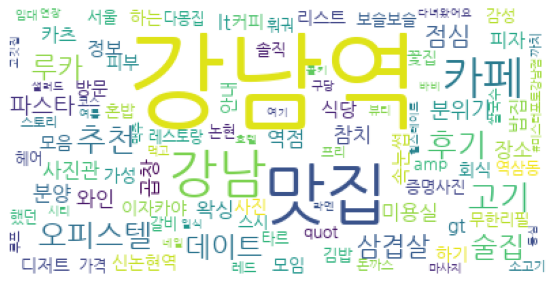

In [15]:
plt.figure(figsize = (10, 5))
plt.imshow(word_cloud)
plt.axis("off")